# **STINTSY Project**
**S16 Group <#>**

Names:

Adrada, Jasper John

David, Rain Caitlin Aelis

Badiola, Maxine Beatriz

Ogatia, Graham Joshua



# **Load Dataset from Google Drive**

In [3]:
import pandas as pd
file = 'pumpkin_seeds.csv'
df = pd.read_csv(file, encoding='latin1')

display(df.head(10))

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,erevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,erevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,erevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,erevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,erevelik


# Section 1. Introduction to the problem/task and dataset

# Section 2. Description of the dataset

# Section 3. List of requirements

# Section 4. Data preprocessing and cleaning

## I. Cleaning the Dataset

Check for duplicates.

In [4]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 0


Check for null values.

In [5]:
null_val = df.isnull().sum()
print("Missing values in each column:\n",null_val)

Missing values in each column:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


Check the unique values in the `Class` column.

In [6]:
print("Class:", df['Class'].unique())

Class: ['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


Replace the corrupted characters to fix the encoding issues.

In [7]:
df['Class'] = df['Class'].str.replace('\x82er\x8develik', 'Cercevelik', regex=False)
df['Class'] = df['Class'].str.replace('\x86rg\x9fp Sivrisi', 'Urgup Sivrisi', regex=False)
print("Fixed unique values in 'Class':", df['Class'].unique())


Fixed unique values in 'Class': ['Cercevelik' 'Urgup Sivrisi']


The models we are using are **Decision Trees**, **Logistic Regression**, and <ML3\>. These models require numerical inputs therefore we need to encode the `Class` column to numerical values. Since the `Class` column is binary,  **label encoding (0,1)** is sufficient for this project.

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

print(df['Class'].unique())  # Output: [0, 1]


[0 1]


## II. Check and Handle Outliers

In [9]:
from scipy.stats import zscore
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numerical column
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Area                 13
Perimeter             8
Major_Axis_Length     8
Minor_Axis_Length     9
Convex_Area          13
Equiv_Diameter        9
Eccentricity         14
Solidity             29
Extent               13
Roundness             4
Aspect_Ration         8
Compactness           2
Class                 0
dtype: int64


Visually see the outliers.

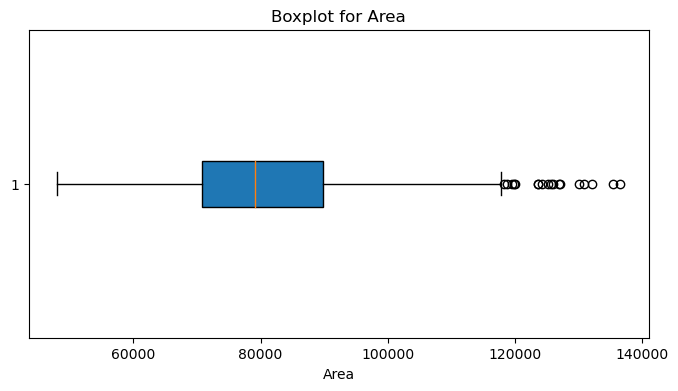

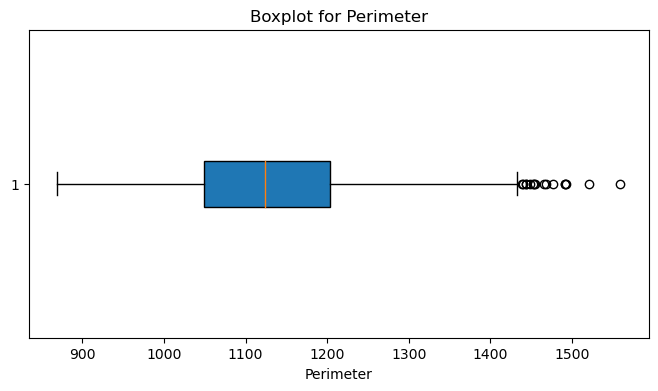

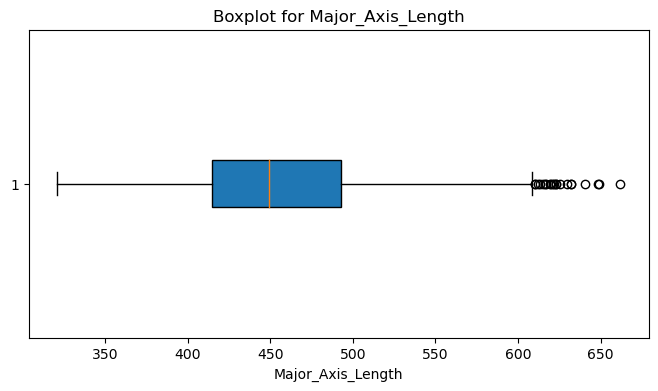

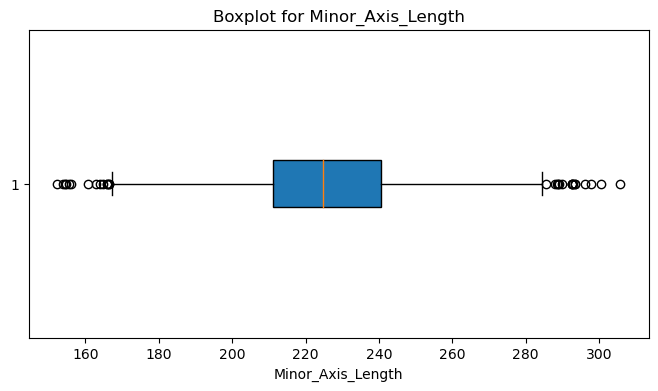

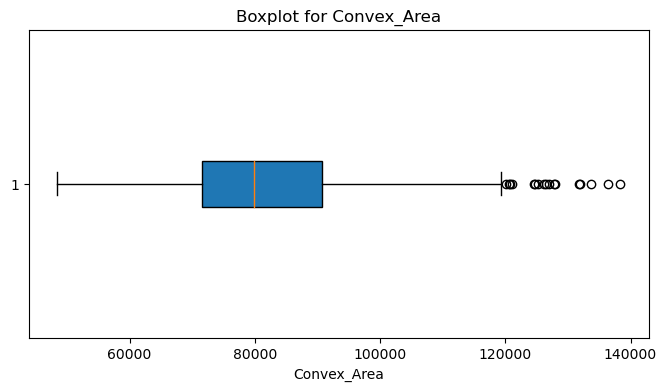

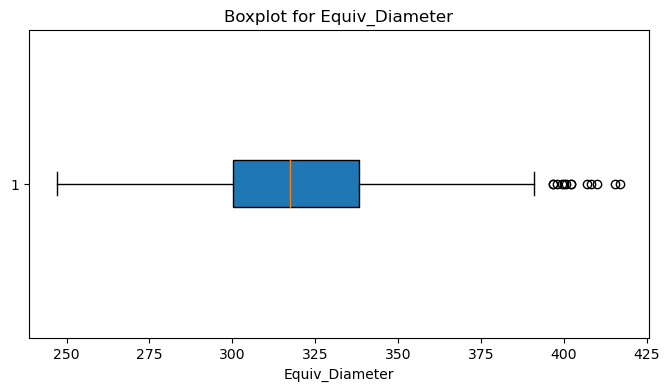

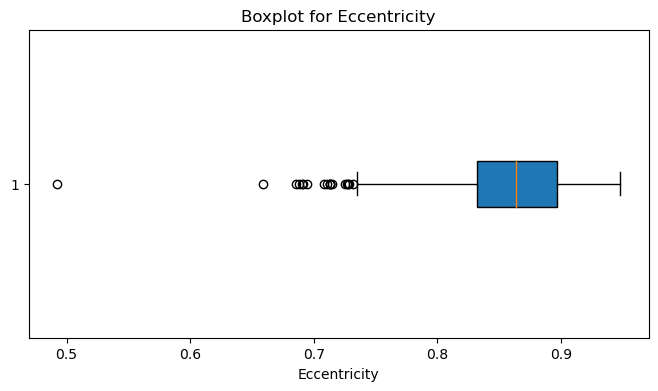

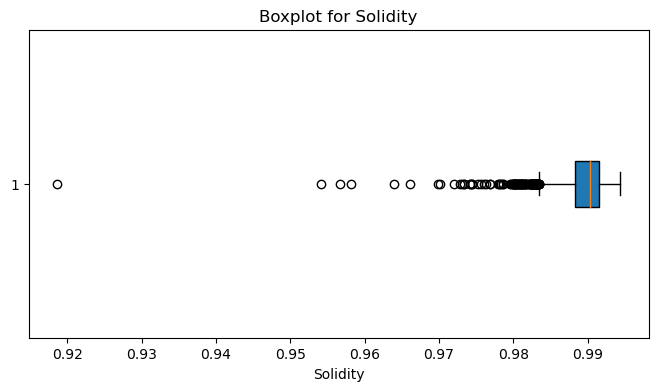

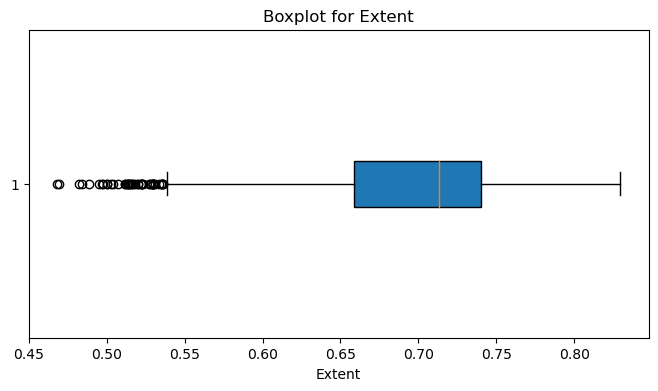

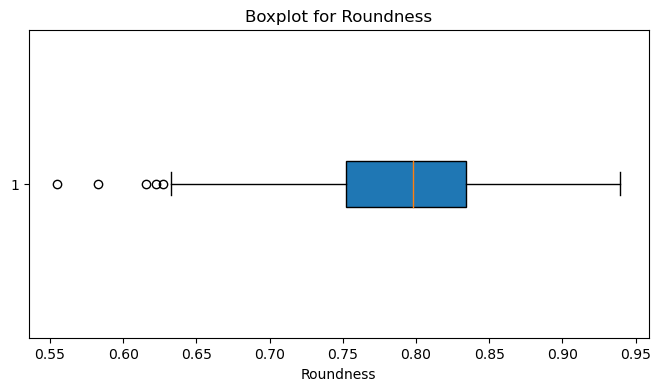

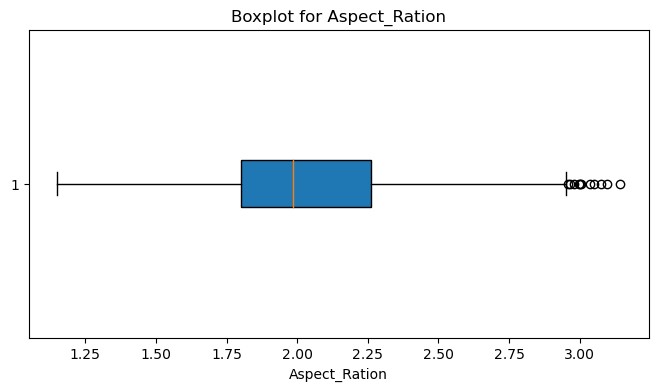

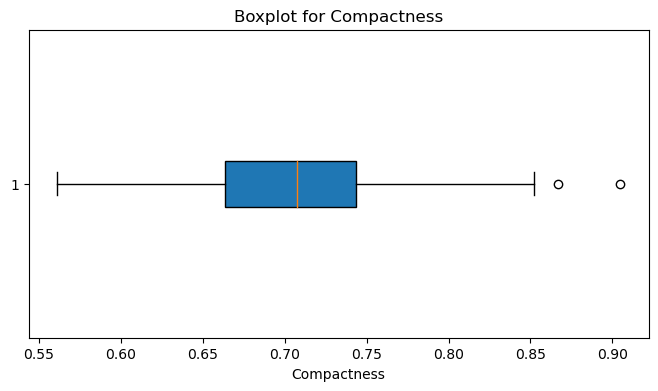

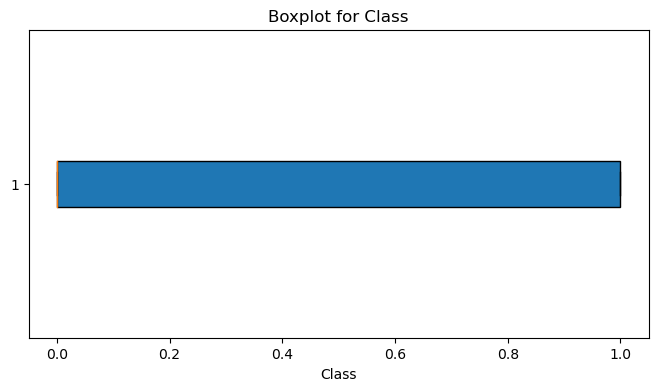

In [10]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

Keep outliers because <explanation\>.

## III. Normalize the Dataset

Check data before normalization.

In [11]:
print(df.describe())

                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min 

Normalize data using MinMax Scale

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the normalized data
print(df.describe())


              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2500.000000  2500.000000        2500.000000        2500.000000   
mean      0.369146     0.378882           0.398037           0.479173   
std       0.154166     0.158121           0.164882           0.151629   
min       0.000000     0.000000           0.000000           0.000000   
25%       0.257528     0.261004           0.275938           0.384482   
50%       0.351295     0.369320           0.377205           0.472067   
75%       0.471806     0.484620           0.503987           0.576006   
max       1.000000     1.000000           1.000000           1.000000   

       Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count  2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean      0.368172        0.425291      0.808727     0.935245     0.622800   
std       0.152904        0.158239      0.099051     0.046090     0.168456   
min       0.000000        0.00

In [13]:
# Calculate Z-scores for each numerical column
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Area                 13
Perimeter             8
Major_Axis_Length     8
Minor_Axis_Length     9
Convex_Area          13
Equiv_Diameter        9
Eccentricity         14
Solidity             29
Extent               13
Roundness             4
Aspect_Ration         8
Compactness           2
Class                 0
dtype: int64


Check cleaned dataset.

In [14]:
display(df)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304,0.0
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062,0.0
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900,0.0
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876,0.0
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.357624,0.515547,0.622479,0.249046,0.355651,0.419964,0.969079,0.951187,0.057522,0.292468,0.827229,0.106074,1.0
2496,0.244915,0.312365,0.416625,0.258055,0.242729,0.298503,0.916667,0.967018,0.365597,0.492987,0.633712,0.239756,1.0
2497,0.451910,0.494712,0.546449,0.455692,0.448088,0.515824,0.892325,0.968338,0.819414,0.520260,0.568272,0.287998,1.0
2498,0.361844,0.455106,0.530869,0.342223,0.361439,0.424359,0.923026,0.928760,0.745022,0.425714,0.652703,0.218251,1.0


# Section 5. Exploratory data analysis

Display dataset information.

In [15]:
display(df.head())
print(df.info())
print(df.describe())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304,0.0
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062,0.0
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900,0.0
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876,0.0
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   float64
dtypes: float64(13)
memory usage: 254.0 KB
None
              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2500.000000  2500.000000        2500.000000  

Analyze the `Class` Variable

In [16]:
print(df['Class'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
plt.ylabel("Count")
plt.show()


Class
0.0    1300
1.0    1200
Name: count, dtype: int64


ModuleNotFoundError: No module named 'seaborn'

Visualize the distribution of numerical features.

In [ ]:
# Plot histograms for all numerical features
df.loc[:, df.columns != 'Class'].hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Feature Distributions (Excluding Class)", fontsize=20)
plt.show()

Check correlation between pictures.

In [ ]:
# correlation matrix
corr_matrix = df.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Visualize the relationship between features and the `Class` variable.

In [ ]:
# Boxplots for numerical features grouped by 'Class'
for col in df.columns[:-1]:  # Exclude 'Class'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f"{col} by Class")
    plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
    plt.ylabel(col)
    plt.show()


In [ ]:
# pairwise relationships
sns.pairplot(df, hue='Class', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()


# Section 6. Initial model training

## I. KNN

## II. Decision Trees

## III. Logistic Regression

REFERENCE: [Logistic Regression: Sklearn\Scikit](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

In [ ]:
display(df.head())
print(df.info())
print(df.describe())

In [ ]:
##import logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #not used for now
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#logistic regression table copy
df_logistic = df.copy()
X_logistic = df_logistic.drop('Class', axis=1)  #features
y_logistic = df_logistic['Class']  #target

#training set = 70%, test set = 30%
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.3, random_state=1
)

model_logistic = LogisticRegression()
model_logistic.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = model_logistic.predict(X_test_logistic)

In [ ]:
#summarize results

# Section 7. Error analysis

## I. Logistic Regression

##II. ML 2

##III. ML 3

# Section 8. Improving model Performance

##I. Logistic Regression

##II. ML 2

## III. ML 3

# Section 9. Model performance summary

## I. Logistic Regression

## II. ML 2

## III. ML 3

# Section 10. Insights and conclusions

# Section 11. Reference